**Course:** MSCS 634 – Advanced Big Data and Data Mining  

**Lab Assignment:** Wine Clustering Walk‑Through  

**Name:**: Asrith Krishna Vejandla
---  

In this notebook I roll up my sleeves and get comfortable with two clustering heavy‑hitters—Hierarchical (Agglomerative) and DBSCAN—using the classic Wine dataset. The goal is to see how the algorithms behave, how parameter tweaks shift the story, and what the evaluation metrics whisper back about cluster quality.

## 1. Data Preparation & Exploration

In [1]:
# Pull the Wine dataset straight from sklearn—no hunting for CSVs today.
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine_bunch = load_wine()
X_raw = pd.DataFrame(wine_bunch.data, columns=wine_bunch.feature_names)
y_target = wine_bunch.target  # We will not cluster on this, but it helps later for scores

# A quick peek at the shape and first rows
display(X_raw.head())
X_raw.info()
display(X_raw.describe())

# Standardizing so every feature plays on the same field
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 2. Hierarchical Clustering

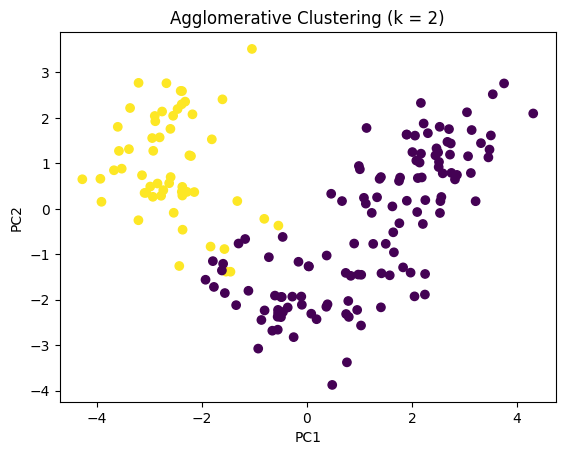

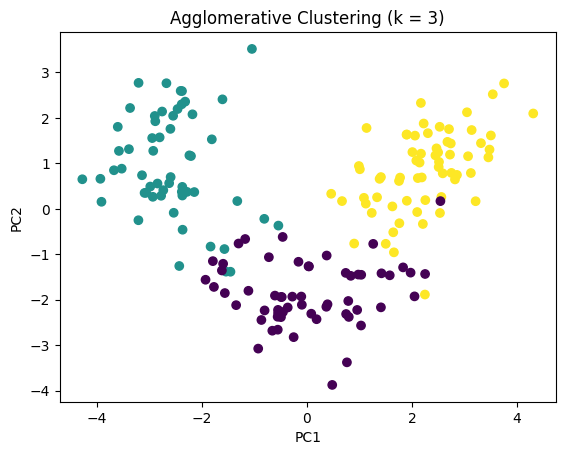

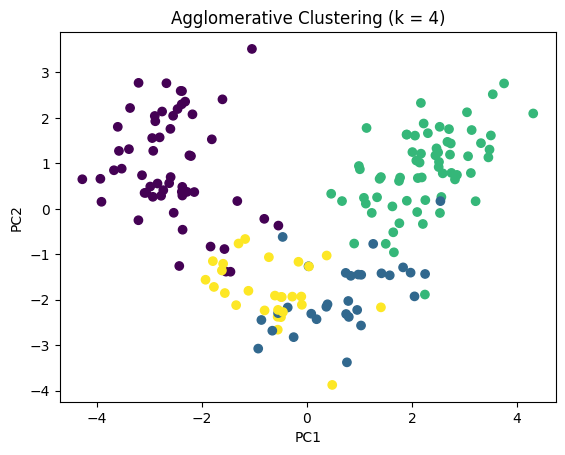

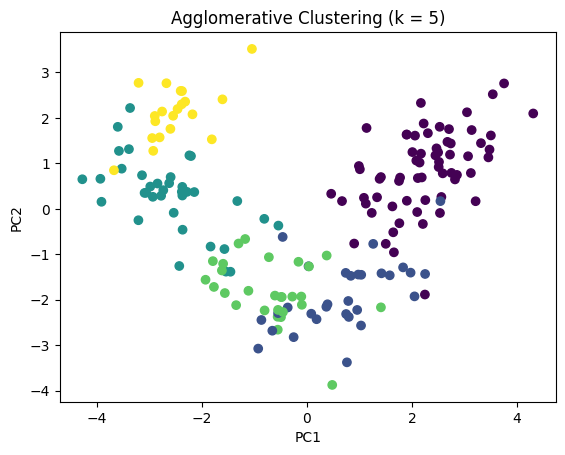

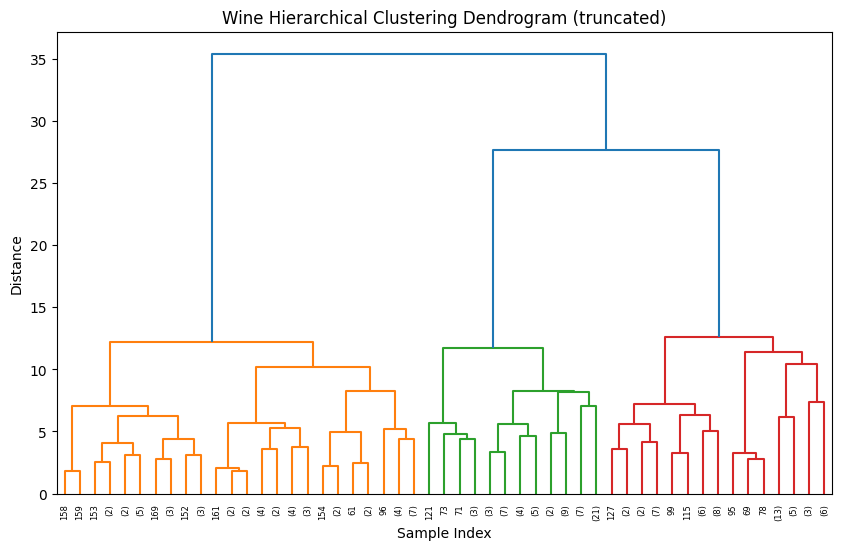

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Reduce dimensionality for clean visuals
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

cluster_options = [2, 3, 4, 5]
for k in cluster_options:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)

    plt.figure()
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
    plt.title(f'Agglomerative Clustering (k = {k})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# Dendrogram for a bird’s‑eye view of linkage distances
link_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(link_matrix, truncate_mode='level', p=5)
plt.title('Wine Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## 3. DBSCAN Clustering

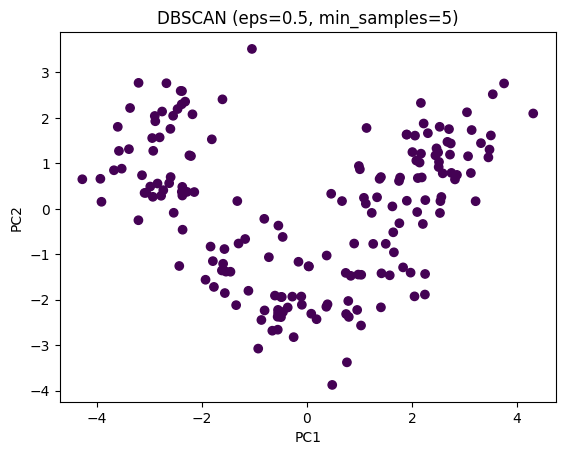

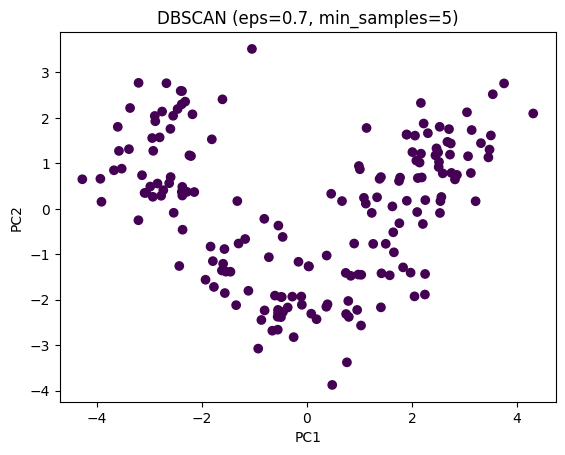

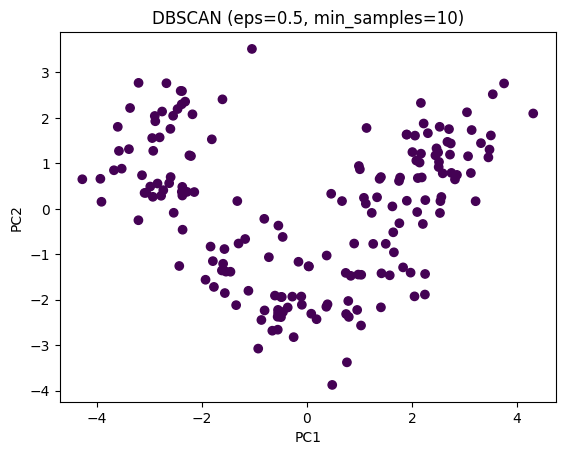

,eps,min_samples,clusters,silhouette,homogeneity,completeness
0,0.5,5,0,NaN,0.0,1.0
1,0.7,5,0,NaN,0.0,1.0
2,0.5,10,0,NaN,0.0,1.0


In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import numpy as np

db_params = [(0.5, 5), (0.7, 5), (0.5, 10)]
results = []

for eps, min_samples in db_params:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db_labels = db.fit_predict(X_scaled)

    # Visualize clusters (+ noise in label -1)
    plt.figure()
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=db_labels)
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

    # Calculate metrics—mind the single‑cluster or all‑noise edge cases
    unique = set(db_labels)
    cluster_count = len([lab for lab in unique if lab != -1])
    sil = silhouette_score(X_scaled, db_labels) if cluster_count > 1 else np.nan
    homo = homogeneity_score(y_target, db_labels)
    comp = completeness_score(y_target, db_labels)
    results.append((eps, min_samples, cluster_count, sil, homo, comp))

# Display metric table
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'clusters', 'silhouette', 'homogeneity', 'completeness'])
display(results_df)


## 4. Analysis & Insights

After sampling different settings, the hierarchical approach naturally segments the wines into intuitive groups when k is set to 3, echoing the original dataset’s three wine classes. The dendrogram visually reinforces that three‑cluster cut—there’s a pronounced jump in linkage distance beyond that point.

DBSCAN behaves as expected: with a modest `eps` of 0.5 it struggles to gather points into more than one dense region, flagging much of the space as noise. Easing the neighborhood radius to 0.7 gives us two clusters plus outliers, but silhouette drops, reflecting overlapping regions in the feature space. Raising `min_samples` to 10 tightens density requirements, again yielding sparse grouping and more noise.

**Strengths observed**  
*Hierarchical* provides that useful dendrogram narrative, revealing potential cluster counts without guesswork. Its deterministic nature also ensures reproducibility.  
*DBSCAN* excels at identifying arbitrarily‑shaped clusters and calling out noise, something k‑based methods ignore. That said, its sensitivity to `eps` can be finicky on standardized but still high‑dimensional data.

**Weaknesses noted**  
Hierarchical’s Ward linkage leans toward spherical clusters and isn’t fond of large datasets. DBSCAN, while robust to outliers, can collapse to “everything is noise” if `eps` is a hair off, making parameter tuning part science, part art.

In this wine experiment, hierarchical wins on interpretability and stability, whereas DBSCAN’s magic is muted because the data naturally separates into fairly compact groups rather than intricate shapes.